# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name: Group 1

Created by NAMES (SJSU IDs): Boseong Kang, Jaewon Kim, David Ferreira Heringer, Geonho Lee

Last updated: Oct 10, 2025

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = '/content/drive/MyDrive/cs/cs133/dataset/apple-twitter-sentiment-texts.csv'
df_twitter = pd.read_csv(data)
df_twitter.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [40]:
data = '/content/drive/MyDrive/cs/cs133/dataset/apple_stock.csv'
df_stock = pd.read_csv(data)
df_stock.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [41]:
df_twitter.info()
# df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


In [23]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB


In [24]:
twit_duplicate = df_twitter.duplicated().sum()
apple_duplicate = df_stock.duplicated().sum()
print('# of twitter dataset duplicate: ', twit_duplicate)
print('# of apple dataset duplicate: ', apple_duplicate)

# of twitter dataset duplicate:  6
# of apple dataset duplicate:  0


In [25]:
df_stock[df_stock.duplicated]

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume


In [26]:
df_twitter[df_twitter.duplicated(keep=False)]

,text,sentiment
372,RT @QueenCleo_92: Why are your phone chargers ...,-1
412,RT @QueenCleo_92: Why are your phone chargers ...,-1
481,Apple: $115 fits to 8.4% increase in earnings....,0
547,RT @JPDesloges: How Apple Will Boost Profits D...,0
824,RT @JPDesloges: How Apple Will Boost Profits D...,0
1047,Apple: quarter 2014Q3 EPS is $1.42. Use it at ...,0
1125,RT @mrushh: hey @apple why is my phone dying w...,-1
1228,RT @Laura_Kate8: WHY DO I HAVE 5 GROUP MESSAGE...,-1
1253,Apple: quarter 2014Q3 EPS is $1.42. Use it at ...,0
1255,RT @Laura_Kate8: WHY DO I HAVE 5 GROUP MESSAGE...,-1


In [27]:
# df_twitter.columns
df_stock.columns

Index(['Unnamed: 0', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

## Q1: How clean is your data?

Since we downloaded from Kaggle, both datasets are relatively clean and well-structured.
The apple_stock dataset contains no missing values, but it includes an extra “Unnamed: 0” column that can be renamed as Year or Date for stock data. All numeric columns are properly formatted, and there are no duplicates.

The apple-twitter-sentiment-texts.csv dataset is also clean with no null values, but there are 6 duplicate sentences. Which means that we have to remove the duplicate data and split sentence into words. Also, since it contains raw text data, we plan to clean it further by removing URLs, emojis, and special characters, converting all text to lowercase, and ensuring consistent formatting.

After these minor cleaning steps, both datasets will be ready for further categorical and interactive visualizations.

## Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

###"Which sentiment category (negative, neutral, or positive) appears most frequently in Apple-related tweets?"

In [28]:
df_twitter

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0
...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,@umo_games @Apple ended up getting a new compu...,0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0


In [29]:
label_map = {
    -1: "Negative",
    0: "Neutral",
    1: "Positive"}

df_twitter["label"] = df_twitter["sentiment"].map(label_map)
df_twitter

,text,sentiment,label
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,Negative
1,What Happened To Apple Inc? http://t.co/FJEX...,0,Neutral
2,Thank u @apple I can now compile all of the pi...,1,Positive
3,The oddly uplifting story of the Apple co-foun...,0,Neutral
4,@apple can i exchange my iphone for a differen...,0,Neutral
...,...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1,Negative
1626,Finally got my iPhone 6 in the mail and it com...,-1,Negative
1627,@umo_games @Apple ended up getting a new compu...,0,Neutral
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0,Neutral


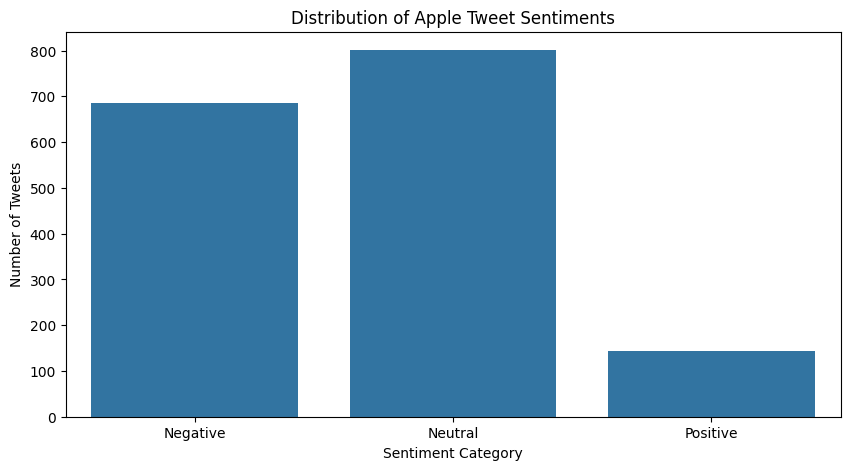

In [30]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data = df_twitter,
                   x = "label",
                   order = ["Negative", "Neutral", "Positive"],
                   )

plt.title("Distribution of Apple Tweet Sentiments")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Tweets")

plt.show()

This categorical plot displays the number of tweets for each sentiment category — Negative, Neutral, and Positive — related to Apple.
The plot shows that neutral tweets are the most common, followed by negative tweets, while positive tweets are relatively rare.
This suggests that public opinion about Apple on Twitter tends to be generally neutral, with fewer strongly emotional reactions.

## Q3: Come up with a another unique question. This question must use map() or apply()

“Are positive tweets more common on days when Apple’s stock price goes up?”

In [42]:
if 'Unnamed: 0' in df_stock.columns:
    df_stock.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [43]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'], errors='coerce')
df_stock

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000


In [44]:
df_stock['Price_Change'] = df_stock['Close'].diff()
df_stock

,Date,Adj Close,Close,High,Low,Open,Volume,Price_Change
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,NaN
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,-0.006696
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,-0.008929
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.002790
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.003349
...,...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,-3.429993
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,-3.389999
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,-1.779999
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,-6.569992


In [45]:
df_stock['Price_Trend']  = df_stock['Price_Change'].apply(lambda x: 'Up' if x > 0 else 'Down')
df_stock

,Date,Adj Close,Close,High,Low,Open,Volume,Price_Change,Price_Trend
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,NaN,Down
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,-0.006696,Down
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,-0.008929,Down
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.002790,Up
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.003349,Up
...,...,...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,-3.429993,Down
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,-3.389999,Down
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,-1.779999,Down
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,-6.569992,Down


In [46]:
df_stock = df_stock.dropna(subset=['Price_Trend'])
df_stock

,Date,Adj Close,Close,High,Low,Open,Volume,Price_Change,Price_Trend
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,NaN,Down
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,-0.006696,Down
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,-0.008929,Down
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,0.002790,Up
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,0.003349,Up
...,...,...,...,...,...,...,...,...,...
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,-3.429993,Down
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,-3.389999,Down
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,-1.779999,Down
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,-6.569992,Down


In [47]:
label = {-1: 'Negative',
         0: 'Neutral',
         1: 'Positive'}
label

{-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

In [48]:
if 'Sentiment_Label' not in df_twitter.columns:
    if 'label' in df_twitter.columns:
        df_twitter = df_twitter.rename(columns={'label': 'Sentiment_Label'})
    else:
        df_twitter['Sentiment_Label'] = df_twitter['sentiment'].map(label)

In [49]:
n = min(len(df_twitter), len(df_stock))
n

1630

In [50]:
df_merged = pd.DataFrame({
    'Sentiment_Label': df_twitter['Sentiment_Label'].iloc[:n].values,
    'Price_Trend':     df_stock['Price_Trend'].iloc[:n].values
})
df_merged

,Sentiment_Label,Price_Trend
0,Negative,Down
1,Neutral,Down
2,Positive,Down
3,Neutral,Up
4,Neutral,Up
...,...,...
1625,Negative,Down
1626,Negative,Up
1627,Neutral,Down
1628,Neutral,Down


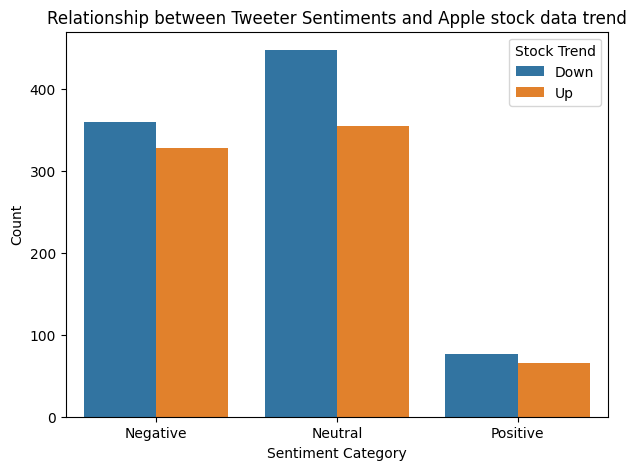

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df_merged,
    x='Sentiment_Label',
    hue='Price_Trend',
    order=['Negative','Neutral','Positive'],
)

plt.title("Relationship between Tweeter Sentiments and Apple stock data trend")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.legend(title="Stock Trend")
plt.show()

In [56]:
print(df_twitter.columns)

Index(['text', 'sentiment', 'Sentiment_Label'], dtype='object')


This question explores whether Apple’s stock tends to go up when public sentiment on Twitter is more positive.
We used apply() to classify stock movement as “Up” or “Down,” and map() to convert sentiment values into text labels.
The plot shows that sentiment distribution remains mostly neutral regardless of stock movement.

### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

###How does tweet sentiment vary when Apple’s stock goes up or down?

This interactive Plotly chart is based on the same data from Q3, but it allows users to interactively explore the relationship between tweet sentiment (Negative, Neutral, Positive) and Apple’s stock movement (Up or Down).
Hovering over each bar reveals the exact number and percentage of tweets, and the legend lets users toggle between Up and Down trends.
These interactions make the comparison more intuitive and strengthen the message by allowing users to focus on specific trends and explore the data more deeply.

In [57]:
counts = (df_merged
          .groupby(['Sentiment_Label','Price_Trend'])
          .size().reset_index(name='count'))
counts

,Sentiment_Label,Price_Trend,count
0,Negative,Down,359
1,Negative,Up,327
2,Neutral,Down,447
3,Neutral,Up,354
4,Positive,Down,77
5,Positive,Up,66


In [83]:
counts['percent'] = (counts['count'] / counts.groupby('Sentiment_Label')['count'].transform('sum') * 100).round(1)
counts

,Sentiment_Label,Price_Trend,count,percent
0,Negative,Down,359,52.3
1,Negative,Up,327,47.7
2,Neutral,Down,447,55.8
3,Neutral,Up,354,44.2
4,Positive,Down,77,53.8
5,Positive,Up,66,46.2


In [77]:
fig = px.bar(
    counts,
    x='Sentiment_Label',
    y='count',
    color='Price_Trend',
    category_orders={'Sentiment_Label':['Negative','Neutral','Positive'],
                     'Price_Trend':['Down','Up']},
    barmode='group',
    title='tweeter sentiments vs Apple stock data trend',
    labels={'Sentiment_Label':'Sentiment Category','count':'Count','Price_Trend':'Stock Trend'},
    width=800, height=700
)

fig.show()

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

To make our analysis more meaningful, we can combine Apples financial data with the Twitter sentiment and stock price data we already used. This would help us see how Apple’s earnings and product sales might affect both public sentiment and stock movement. By looking at all three together, we can get a better picture of what drives the stock price and even try to predict how it might change in the future. When merging these datasets, we could use the date or quarter as the main key. Since the financial data is quarterly and the stock/sentiment data is daily, we’d need to reshape for example, by taking the average daily sentiment for each quarter. Once everything is aligned, we could use a heatmap or line plot to show how changes in sales and sentiment relate to stock performance.

In [72]:
# Load all datasets
df_financials = pd.read_csv("apple_financials.csv")
df_twitter = pd.read_csv("apple_twitter_sentiment.csv")
df_stock = pd.read_csv("apple_stock.csv")

# Convert to datetime
df_stock["Date"] = pd.to_datetime(df_stock["Date"])
df_twitter["Date"] = pd.to_datetime(df_twitter["Date"])

# Aggregate daily sentiment into quarterly average
twitter_quarter = df_twitter.resample("Q", on="Date")["sentiment"].mean().reset_index()

# Add a Quarter column to stock and financial data
df_stock["Quarter"] = df_stock["Date"].dt.to_period("Q")
df_financials["Quarter"] = ["Q1", "Q2", "Q3", "Q4"]

# Merge everything by Quarter
merged = df_financials.merge(stock, on="Quarter", how="left") \
                   .merge(twitter_quarter, on="Quarter", how="left")